<a href="https://colab.research.google.com/github/a-donat/Data-Science-Portfolio/blob/master/Facebook_Ad_Bidding_AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of Facebook Ad Bidding Strategies Using A/B Testing

by Annalisa Donat

Task: Help company decide whether to switch it's facebook ad system to maximum bidding or to continue with average bidding.

<u>Table of Contents:</u><br>
I. Set-Up<br>
II. Data Preprocessing<br>
III. A/B Tests<br>
IV. Summary

# I. Set-Up

## I.A. Download Data and Import Libraries

**Don't forget to upload kaggle credentials json.**

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d furth3r/facebook-ab-test-of-bidding-feature
! unzip '/content/facebook-ab-test-of-bidding-feature.zip' -d '/content/data'

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# II. Data Preprocessing

In [3]:
average_bidding = pd.read_csv("/content/data/ab_test/control_group.csv")
maximum_bidding = pd.read_csv("/content/data/ab_test/test_group.csv")

*   <code>Impression</code>: Number of impressions per ad.
*   <code>Click</code>: Numbers of clicks per ad.
*   <code>Purchase</code>: The number of products purchased after the click.
*   <code>Earnings</code>: Earning after purchase.




In [4]:
average_bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


In [5]:
maximum_bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


Combine datasets:

In [6]:
average_bidding["bidding"]= "average"
maximum_bidding["bidding"]= "maximum"
combined_bidding = pd.concat([average_bidding, maximum_bidding])


Calculate additional features:

In [7]:
for x in ["Click", "Purchase", "Earning"]:
  combined_bidding[
      x + "_per_Impression"] = combined_bidding[x]/combined_bidding["Impression"]

for x in ["Purchase", "Earning"]:
  combined_bidding[
      x + "_per_Click"] = combined_bidding[x]/combined_bidding["Click"]

combined_bidding[
    "Earning_per_Purchase"] = combined_bidding[
        "Earning"]/combined_bidding["Purchase"]



In [8]:
combined_bidding.describe().round(0).transpose()

,count,mean,std,min,25%,50%,75%,max
Impression,80.0,111112.0,21624.0,45476.0,95064.0,114037.0,124139.0,158606.0
Click,80.0,4534.0,1272.0,1837.0,3633.0,4322.0,5273.0,7959.0
Purchase,80.0,566.0,148.0,267.0,458.0,532.0,679.0,890.0
Earning,80.0,2212.0,422.0,1254.0,1946.0,2206.0,2541.0,3171.0
Click_per_Impression,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Purchase_per_Impression,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Earning_per_Impression,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Purchase_per_Click,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Earning_per_Click,80.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Earning_per_Purchase,80.0,4.0,1.0,2.0,3.0,4.0,5.0,8.0


In [9]:
combined_bidding.groupby("bidding").mean().transpose()

bidding,average,maximum
Impression,101711.450000,120512.425000
Click,5100.625000,3967.550000
Purchase,550.900000,582.050000
Earning,1908.575000,2514.925000
Click_per_Impression,0.053618,0.034176
Purchase_per_Impression,0.005580,0.004921
Earning_per_Impression,0.019473,0.021398
Purchase_per_Click,0.115924,0.156551
Earning_per_Click,0.408358,0.668312
Earning_per_Purchase,3.688122,4.653562


# III. A/B Tests

## III. A. Impressions

H<sub>0</sub>: mean(Impressions<sub>Average Bidding</sub>) = mean(Impressions<sub>Average Bidding</sub>)

In [ ]:
combined_bidding.groupby("bidding")["Impression"].describe(
    percentiles=[.05, .25, .75, .95]).round(0).transpose()

bidding,average,maximum
count,40.0,40.0
mean,101711.0,120512.0
std,20302.0,18807.0
min,45476.0,79034.0
5%,79412.0,83151.0
25%,85727.0,112692.0
50%,99790.0,119292.0
75%,115212.0,132051.0
95%,132950.0,153179.0
max,147539.0,158606.0


In [ ]:
ttest_ind(average_bidding["Impression"],
          maximum_bidding["Impression"])

TtestResult(statistic=-4.296602570348743, pvalue=4.954665932520585e-05, df=78.0)

As p-value=2.45e-05 < 0.05/2, reject the null hypothesis. <br> **mean [Impressions<sub>Average Bidding</sub>] < mean [Impressions<sub>Maximum Bidding</sub>]**

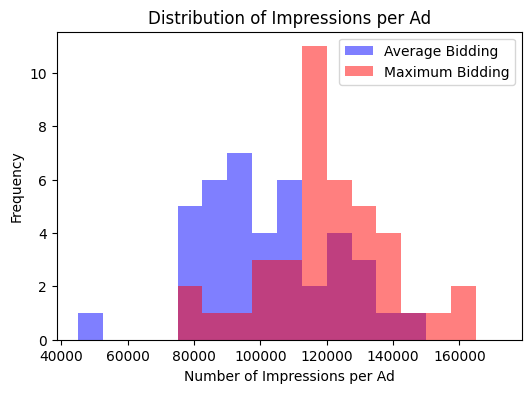

Mean Impressions per Ad was significantly higher when using Maximum Bidding.


In [13]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(average_bidding["Impression"], bins=np.arange(6, 24)*7500,
         color="blue", alpha=.5, label="Average Bidding")
ax.hist(maximum_bidding["Impression"], bins=np.arange(6, 24)*7500,
         alpha=.5, color="red", label="Maximum Bidding")
ax.legend()
ax.set_title("Distribution of Impressions per Ad")
ax.set_xlabel("Number of Impressions per Ad")
ax.set_ylabel("Frequency")
plt.show()

print(
    "Mean Impressions per Ad was significantly higher when using Maximum Bidding.")


## III. B. Clicks

In [15]:
combined_bidding.groupby("bidding")["Click"].describe(
    percentiles=[.05, .25, .75, .95]).round(0).transpose()

bidding,average,maximum
count,40.0,40.0
mean,5101.0,3968.0
std,1330.0,923.0
min,2190.0,1837.0
5%,3368.0,2601.0
25%,4124.0,3376.0
50%,5002.0,3932.0
75%,5924.0,4660.0
95%,7374.0,5271.0
max,7959.0,6020.0


In [14]:
ttest_ind(average_bidding["Click"],
          maximum_bidding["Click"])

TtestResult(statistic=4.426573093387519, pvalue=3.074501441158839e-05, df=78.0)

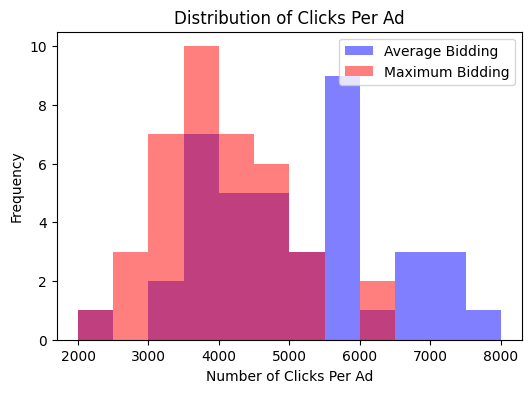

Mean Clicks per Ad was significantly higher when using Average Bidding.


In [18]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(average_bidding["Click"], bins=np.arange(2000, 8500, 500),
         color="blue", alpha=.5, label="Average Bidding")
ax.hist(maximum_bidding["Click"], bins=np.arange(2000, 8500, 500),
         color="red", alpha=.5, label="Maximum Bidding")
ax.legend()
ax.set_title("Distribution of Clicks Per Ad")
ax.set_xlabel("Number of Clicks Per Ad")
ax.set_ylabel("Frequency")
plt.show()

print(
    "Mean Clicks per Ad was significantly higher when using Average Bidding.")

## III. C. Purchases

In [19]:
combined_bidding.groupby("bidding")["Purchase"].describe(
    percentiles=[.05, .25, .75, .95]).round(0).transpose()

bidding,average,maximum
count,40.0,40.0
mean,551.0,582.0
std,134.0,161.0
min,267.0,312.0
5%,328.0,356.0
25%,470.0,445.0
50%,532.0,551.0
75%,638.0,700.0
95%,748.0,854.0
max,802.0,890.0


In [21]:
ttest_ind(average_bidding["Purchase"],
          maximum_bidding["Purchase"])

TtestResult(statistic=-0.9396022967737262, pvalue=0.3503222763935574, df=78.0)

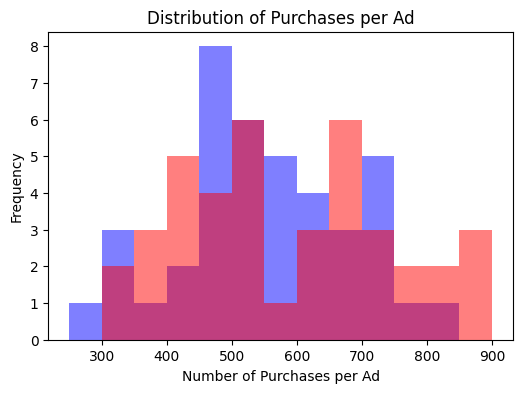

There was no significant difference in Purchases per Ad when using Average Bidding vs Maximum Bidding.


In [51]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(average_bidding["Purchase"], bins=np.arange(250, 950, 50),
        color="blue", alpha=.5, label="Average Bidding")
ax.hist(maximum_bidding["Purchase"], bins=np.arange(250, 950, 50),
         color="red", alpha=.5, label="Maximum Bidding")
ax.set_title("Distribution of Purchases per Ad")
ax.set_xlabel("Number of Purchases per Ad")
ax.set_ylabel("Frequency")
plt.show()
print("There was no significant difference in Purchases per Ad when using Average Bidding vs Maximum Bidding.")


## III. D. Earnings

In [25]:
combined_bidding.groupby("bidding")["Earning"].describe(
    percentiles=[.05, .25, .75, .95]).round(0).transpose()

bidding,average,maximum
count,40.0,40.0
mean,1909.0,2515.0
std,303.0,283.0
min,1254.0,1940.0
5%,1330.0,2081.0
25%,1686.0,2280.0
50%,1975.0,2544.0
75%,2120.0,2762.0
95%,2318.0,2931.0
max,2497.0,3171.0


In [27]:
ttest_ind(average_bidding["Earning"],
          maximum_bidding["Earning"])

TtestResult(statistic=-9.256092651165002, pvalue=3.440360154842526e-14, df=78.0)

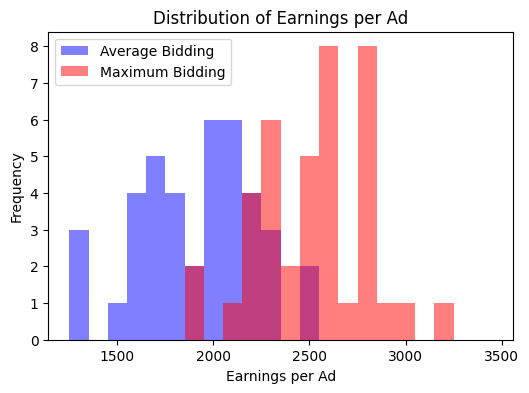

Mean Earnings per Ad was significantly higher when using Maximum Bidding.


In [28]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(average_bidding["Earning"], bins=np.arange(1250, 3500, 100),
        color="blue", alpha=.5, label="Average Bidding")
ax.hist(maximum_bidding["Earning"], bins=np.arange(1250, 3500, 100),
         color="red", alpha=.5, label="Maximum Bidding")
ax.legend()
ax.set_title("Distribution of Earnings per Ad")
ax.set_xlabel("Earnings per Ad")
ax.set_ylabel("Frequency")
plt.show()
print(
    "Mean Earnings per Ad was significantly higher when using Maximum Bidding.")

## III. E. Clicks Per Impression

In [31]:
combined_bidding.groupby("bidding")["Click_per_Impression"].describe(
    percentiles=[.05, .25, .75, .95]).round(4).transpose()

bidding,average,maximum
count,40.0000,40.0000
mean,0.0536,0.0342
std,0.0248,0.0123
min,0.0208,0.0147
5%,0.0283,0.0205
25%,0.0392,0.0282
50%,0.0488,0.0314
75%,0.0580,0.0373
95%,0.0861,0.0576
max,0.1621,0.0757


In [32]:
ttest_ind(average_bidding["Click"]/average_bidding["Impression"],
          maximum_bidding["Click"]/maximum_bidding["Impression"])

TtestResult(statistic=4.43784072533337, pvalue=2.9488794017918994e-05, df=78.0)

In [45]:
ttest_ind(
    (average_bidding["Click"]/average_bidding["Impression"]).clip(upper=.1),
    maximum_bidding["Click"]/maximum_bidding["Impression"])

TtestResult(statistic=4.96740961843736, pvalue=3.916380130150811e-06, df=78.0)

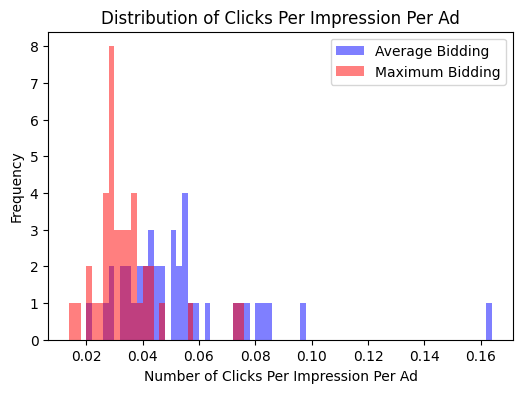

Mean Clicks per Impression per Ad was significantly higher when using Average Bidding.


In [50]:
var = "Clicks Per Impression"
var_code = "Click_per_Impression"
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(
    combined_bidding[combined_bidding["bidding"]=="average"][var_code],
    bins=np.arange(0.014, .166, .002),
         color="blue", alpha=.5, label="Average Bidding")
ax.hist(combined_bidding[combined_bidding["bidding"]=="maximum"][var_code],
        bins=np.arange(0.014, .166, .002),
        alpha=.5, color="red", label="Maximum Bidding")
ax.legend()
ax.set_title("Distribution of " + var + " Per Ad")
ax.set_xlabel("Number of " + var +  " Per Ad")
ax.set_ylabel("Frequency")
plt.show()
print(
    "Mean Clicks per Impression per Ad was significantly higher when using Average Bidding.")

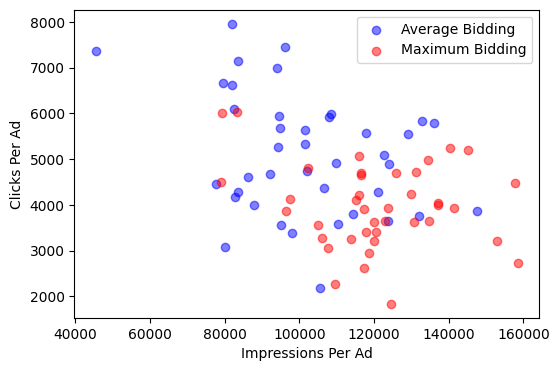

In [88]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter("Impression", "Click",
           data=combined_bidding[combined_bidding["bidding"]=="average"],
           color="blue", alpha=.5, label="Average Bidding")
ax.scatter("Impression", "Click",
           data=combined_bidding[combined_bidding["bidding"]=="maximum"],
           color="red", alpha=.5, label="Maximum Bidding")
ax.legend()
ax.set_xlabel("Impressions Per Ad")
ax.set_ylabel("Clicks Per Ad")
plt.show()


## III. F. Purchases Per Impression

In [58]:
combined_bidding.groupby("bidding")["Purchase_per_Impression"].describe(
    percentiles=[.05, .25, .75, .95]).round(5).transpose()

bidding,average,maximum
count,40.00000,40.00000
mean,0.00558,0.00492
std,0.00155,0.00148
min,0.00223,0.00227
5%,0.00325,0.00290
25%,0.00465,0.00388
50%,0.00544,0.00483
75%,0.00659,0.00577
95%,0.00809,0.00690
max,0.00890,0.00924


In [59]:
ttest_ind(average_bidding["Purchase"]/average_bidding["Impression"],
          maximum_bidding["Purchase"]/maximum_bidding["Impression"])

TtestResult(statistic=1.944268481420964, pvalue=0.055468651724893216, df=78.0)

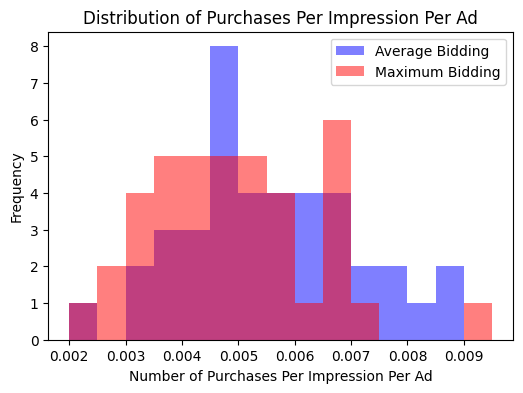

There was no significant difference in Purchases per Impression per Ad 
when using Average Bidding vs Maximum Bidding.


In [65]:
var = "Purchases Per Impression"
var_code = "Purchase_per_Impression"
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(
    combined_bidding[combined_bidding["bidding"]=="average"][var_code],
    bins=np.arange(0.002, .01, .0005),
         color="blue", alpha=.5, label="Average Bidding")
ax.hist(combined_bidding[combined_bidding["bidding"]=="maximum"][var_code],
        bins=np.arange(0.002, .01, .0005),
        alpha=.5, color="red", label="Maximum Bidding")
ax.legend()
ax.set_title("Distribution of " + var + " Per Ad")
ax.set_xlabel("Number of " + var +  " Per Ad")
ax.set_ylabel("Frequency")
plt.show()
print("There was no significant difference in Purchases per Impression per Ad \
\nwhen using Average Bidding vs Maximum Bidding.")

There was no significant difference in Purchases per Impression per Ad when using Average Bidding vs Maximum Bidding. However, if we used a more lenient significant cutoff of p-value < 0.1, we would conclude that Purchases per Impression per Ad was higher when using Average bidding. Recall that mean Impressions per Ad was significantly higher when using Maximum Bidding, and that the there was no significant difference in mean Purchases per Ad when using Average Bidding vs Maximum Bidding.

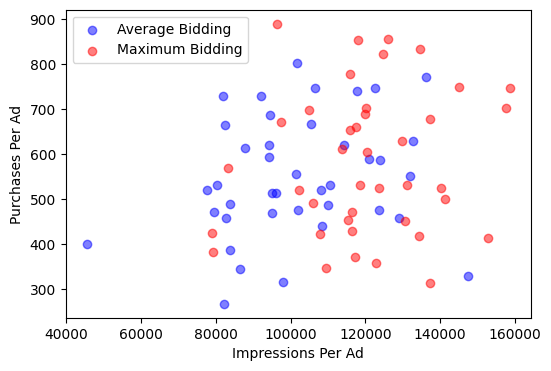

In [68]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter("Impression", "Purchase",
           data=combined_bidding[combined_bidding["bidding"]=="average"],
           color="blue", alpha=.5, label="Average Bidding")
ax.scatter("Impression", "Purchase",
           data=combined_bidding[combined_bidding["bidding"]=="maximum"],
           color="red", alpha=.5, label="Maximum Bidding")
ax.legend()
ax.set_xlabel("Impressions Per Ad")
ax.set_ylabel("Purchases Per Ad")
plt.show()


In [69]:
ttest_ind((average_bidding[average_bidding["Impression"] > 60000]["Purchase"]
           /average_bidding[average_bidding["Impression"] > 60000]["Impression"]),
          maximum_bidding["Purchase"]/maximum_bidding["Impression"])

TtestResult(statistic=1.7312666966789265, pvalue=0.08740933574202567, df=77.0)

Removing the outlier makes any difference less significant.

## III. G. Earnings Per Impression

In [71]:
combined_bidding.groupby("bidding")["Earning_per_Impression"].describe(
    percentiles=[.05, .25, .75, .95]).round(4).transpose()

bidding,average,maximum
count,40.0000,40.0000
mean,0.0195,0.0214
std,0.0048,0.0043
min,0.0106,0.0138
5%,0.0125,0.0161
25%,0.0166,0.0186
50%,0.0187,0.0201
75%,0.0219,0.0234
95%,0.0276,0.0291
max,0.0309,0.0328


In [73]:
ttest_ind(average_bidding["Earning"]/average_bidding["Impression"],
          maximum_bidding["Earning"]/maximum_bidding["Impression"])

TtestResult(statistic=-1.890283586128312, pvalue=0.06243446739066827, df=78.0)

In [74]:
ttest_ind((average_bidding[average_bidding["Impression"] > 60000]["Earning"]
           /average_bidding[average_bidding["Impression"] > 60000]["Impression"]),
          maximum_bidding["Earning"]/maximum_bidding["Impression"])

TtestResult(statistic=-2.11209161589812, pvalue=0.03792105924068737, df=77.0)

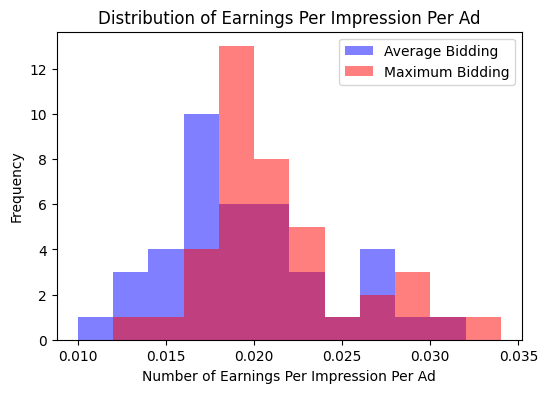

Only after removing an observation with abnormally few impressions was 
mean Earnings per Impression Per Ad significantly higher when using 
Maximum Bidding.


In [78]:
var = "Earnings Per Impression"
var_code = "Earning_per_Impression"
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(
    combined_bidding[combined_bidding["bidding"]=="average"][var_code],
    bins=np.arange(0.01, .036, .002),
         color="blue", alpha=.5, label="Average Bidding")
ax.hist(combined_bidding[combined_bidding["bidding"]=="maximum"][var_code],
        bins=np.arange(0.01, .036, .002),
        alpha=.5, color="red", label="Maximum Bidding")
ax.legend()
ax.set_title("Distribution of " + var + " Per Ad")
ax.set_xlabel("Number of " + var +  " Per Ad")
ax.set_ylabel("Frequency")
plt.show()
print("Only after removing an observation with abnormally few impressions was \
\nmean Earnings per Impression Per Ad significantly higher when using \nMaximum Bidding.")


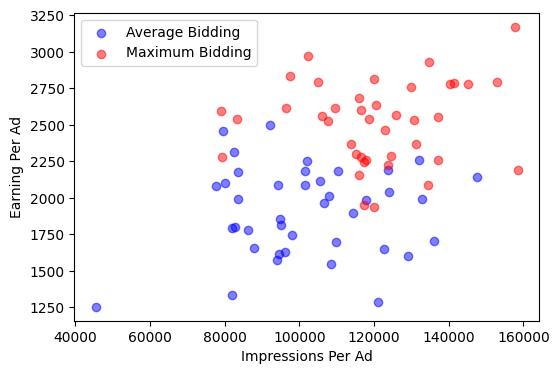

In [87]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter("Impression", "Earning",
           data=combined_bidding[combined_bidding["bidding"]=="average"],
           color="blue", alpha=.5, label="Average Bidding")
ax.scatter("Impression", "Earning",
           data=combined_bidding[combined_bidding["bidding"]=="maximum"],
           color="red", alpha=.5, label="Maximum Bidding")
ax.legend()
ax.set_xlabel("Impressions Per Ad")
ax.set_ylabel("Earning Per Ad")
plt.show()


## III. H. Purchases per Click

In [81]:
combined_bidding.groupby("bidding")["Purchase_per_Click"].describe(
    percentiles=[.05, .25, .75, .95]).round(4).transpose()

bidding,average,maximum
count,40.0000,40.0000
mean,0.1159,0.1566
std,0.0454,0.0682
min,0.0404,0.0636
5%,0.0675,0.0836
25%,0.0852,0.1103
50%,0.1095,0.1462
75%,0.1448,0.1830
95%,0.1715,0.2514
max,0.3041,0.4480


In [83]:
ttest_ind(average_bidding["Purchase"]/average_bidding["Click"],
          maximum_bidding["Purchase"]/maximum_bidding["Click"])

TtestResult(statistic=-3.1373827215830916, pvalue=0.0024053781473362184, df=78.0)

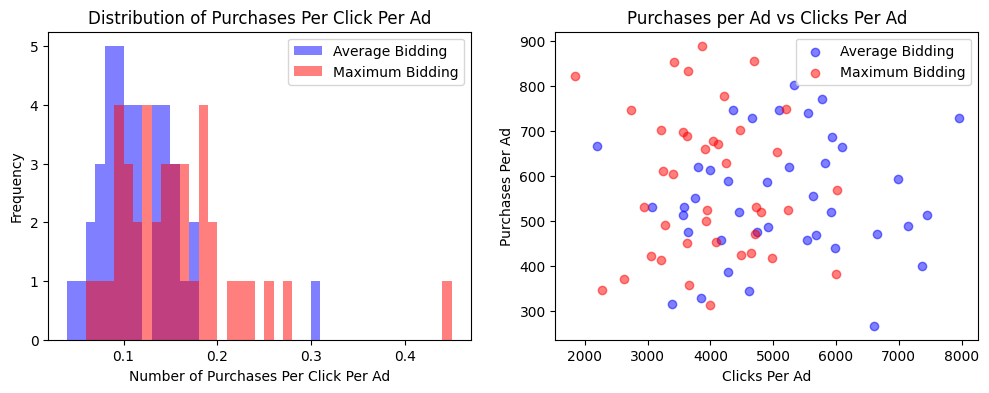

Purchases per Click Per Ad significantly higher when using Maximum Bidding.


In [103]:
var = "Purchases Per Click"
var_code = "Purchase_per_Click"
fig, axes = plt.subplots(figsize=(12,4), ncols=2)
axes[0].hist(
    combined_bidding[combined_bidding["bidding"]=="average"][var_code],
    bins=np.arange(0.04, .46, .01),
         color="blue", alpha=.5, label="Average Bidding")
axes[0].hist(combined_bidding[combined_bidding["bidding"]=="maximum"][var_code],
        bins=np.arange(0.04, .46, .01),
        alpha=.5, color="red", label="Maximum Bidding")
axes[0].legend()
axes[0].set_title("Distribution of " + var + " Per Ad")
axes[0].set_xlabel("Number of " + var +  " Per Ad")
axes[0].set_ylabel("Frequency")

axes[1].scatter("Click", "Purchase",
           data=combined_bidding[combined_bidding["bidding"]=="average"],
           color="blue", alpha=.5, label="Average Bidding")
axes[1].scatter("Click", "Purchase",
           data=combined_bidding[combined_bidding["bidding"]=="maximum"],
           color="red", alpha=.5, label="Maximum Bidding")
axes[1].legend()
axes[1].set_title("Purchases per Ad vs Clicks Per Ad")

axes[1].set_xlabel("Clicks Per Ad")
axes[1].set_ylabel("Purchases Per Ad")

plt.show()
print("Purchases per Click Per Ad significantly higher when using Maximum Bidding.")

## III. I. Earnings per Click

In [54]:
combined_bidding.groupby("bidding")["Earning_per_Click"].describe(
    percentiles=[.05, .25, .75, .95]).round(4).transpose()

bidding,average,maximum
count,40.0000,40.0000
mean,0.4084,0.6683
std,0.1537,0.1757
min,0.1674,0.3795
5%,0.2163,0.4215
25%,0.2993,0.5510
50%,0.3830,0.6560
75%,0.5010,0.7733
95%,0.6134,0.8833
max,0.9644,1.2450


In [104]:
ttest_ind(average_bidding["Earning"]/average_bidding["Click"],
          maximum_bidding["Earning"]/maximum_bidding["Click"])

TtestResult(statistic=-7.043150540249093, pvalue=6.519707747685148e-10, df=78.0)

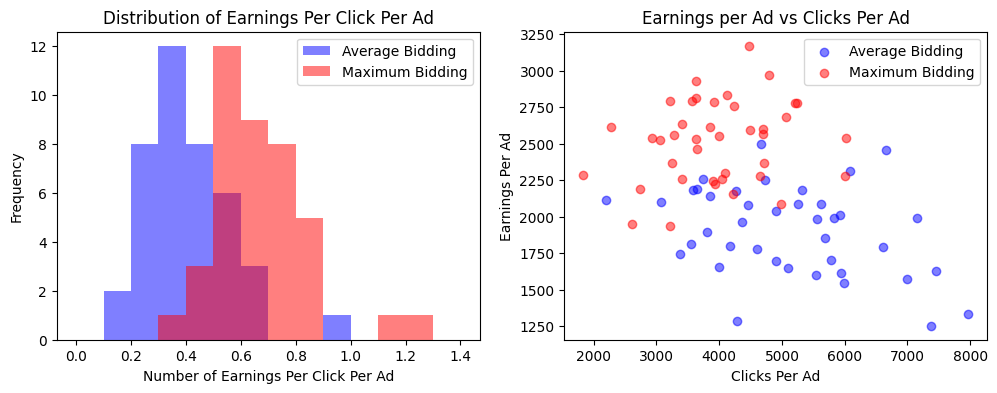

Earnings per Click Per Ad significantly higher when using Maximum Bidding.


In [111]:
var = "Earnings Per Click"
var_code = "Earning_per_Click"
fig, axes = plt.subplots(figsize=(12,4), ncols=2)
axes[0].hist(
    combined_bidding[combined_bidding["bidding"]=="average"][var_code],
    bins=np.arange(0, 1.5, .1),
         color="blue", alpha=.5, label="Average Bidding")
axes[0].hist(combined_bidding[combined_bidding["bidding"]=="maximum"][var_code],
        bins=np.arange(0, 1.5, .1),
        alpha=.5, color="red", label="Maximum Bidding")
axes[0].legend()
axes[0].set_title("Distribution of " + var + " Per Ad")
axes[0].set_xlabel("Number of " + var +  " Per Ad")
axes[0].set_ylabel("Frequency")

axes[1].scatter("Click", "Earning",
           data=combined_bidding[combined_bidding["bidding"]=="average"],
           color="blue", alpha=.5, label="Average Bidding")
axes[1].scatter("Click", "Earning",
           data=combined_bidding[combined_bidding["bidding"]=="maximum"],
           color="red", alpha=.5, label="Maximum Bidding")
axes[1].legend()
axes[1].set_title("Earnings per Ad vs Clicks Per Ad")

axes[1].set_xlabel("Clicks Per Ad")
axes[1].set_ylabel("Earnings Per Ad")

plt.show()
print("Earnings per Click Per Ad significantly higher when using Maximum Bidding.")

## III. J. Earnings per Purchase

In [109]:
combined_bidding.groupby("bidding")["Earning_per_Purchase"].describe(
    percentiles=[.05, .25, .75, .95]).round(2).transpose()

bidding,average,maximum
count,40.00,40.00
mean,3.69,4.65
std,1.14,1.36
min,1.83,2.65
5%,2.21,2.77
25%,2.97,3.66
50%,3.49,4.45
75%,4.08,5.52
95%,5.68,6.94
max,6.71,8.18


In [110]:
ttest_ind(average_bidding["Earning"]/average_bidding["Purchase"],
          maximum_bidding["Earning"]/maximum_bidding["Purchase"])

TtestResult(statistic=-3.440477034619262, pvalue=0.0009356398071798408, df=78.0)

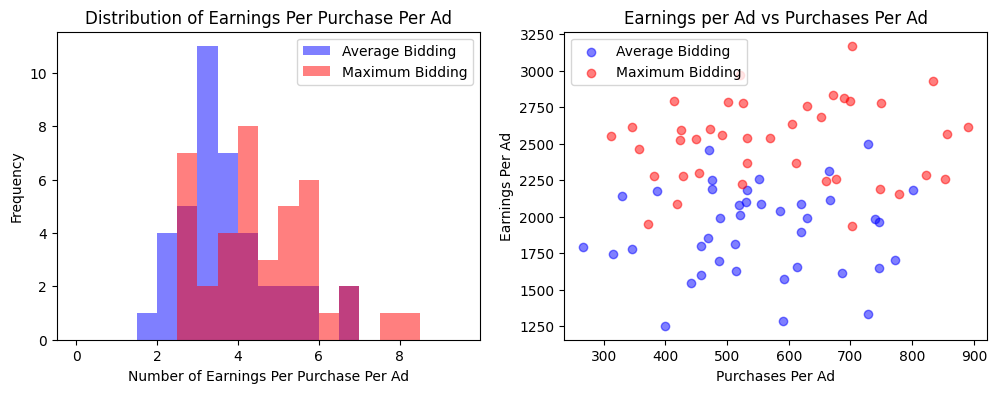

Earnings per Click Per Ad significantly higher when using Maximum Bidding.


In [113]:
var = "Earnings Per Purchase"
var_code = "Earning_per_Purchase"
fig, axes = plt.subplots(figsize=(12,4), ncols=2)
axes[0].hist(
    combined_bidding[combined_bidding["bidding"]=="average"][var_code],
    bins=np.arange(0, 10, .5),
         color="blue", alpha=.5, label="Average Bidding")
axes[0].hist(combined_bidding[combined_bidding["bidding"]=="maximum"][var_code],
        bins=np.arange(0, 10, .5),
        alpha=.5, color="red", label="Maximum Bidding")
axes[0].legend()
axes[0].set_title("Distribution of " + var + " Per Ad")
axes[0].set_xlabel("Number of " + var +  " Per Ad")
axes[0].set_ylabel("Frequency")

axes[1].scatter("Purchase", "Earning",
           data=combined_bidding[combined_bidding["bidding"]=="average"],
           color="blue", alpha=.5, label="Average Bidding")
axes[1].scatter("Purchase", "Earning",
           data=combined_bidding[combined_bidding["bidding"]=="maximum"],
           color="red", alpha=.5, label="Maximum Bidding")
axes[1].legend()
axes[1].set_title("Earnings per Ad vs Purchases Per Ad")

axes[1].set_xlabel("Purchases Per Ad")
axes[1].set_ylabel("Earnings Per Ad")

plt.show()
print("Earnings per Click Per Ad significantly higher when using Maximum Bidding.")

# IV. Summary

|Feature (per Ad)|Better Outcome (p <0.5)|
|-------|------|
|Impressions|Maximum Bidding|
|Clicks|Average Bidding|
|Purchases|no difference|
|Earnings|Maximum Bidding|
|Clicks per Impression|Average Bidding|
|Purchases per Impression|No Difference (Average Bidding at p < 0.1)|
|Earnings per Impression|Maximum Bidding (after removing outlier, else no difference)|
|Purchases per Click|Maximum Bidding|
|Earnings per Click|Maximum Bidding|
|Earnings per Purchase|Maximum Bidding|

**I recommend switching to MAXIMUM BIDDING, as this bidding strategy led to higher earnings.**